<h1 style='color: gold; text-align: center; font-family: cursive;font-size: 30px;'>Hire the perfect candidate</h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>A Perfect Fit : HackerEarth Machine Learning Challenge</h1>

<h1 style='color: #8f7be9; text-align: left; font-family: cursive;font-size: 20px;'>                            <p>Hiring employees effectively is vital to the survival of any organization. The hiring process consists of soliciting potential candidates during the recruitment and then determining the best candidates to be employees during the selection process.</p>

<p>The selection process, in particular, enables organizations to build and maintain a productive and motivated workforce that will be the key to their success.&nbsp;</p>

<p><strong>Task</strong></p>

<p>You want to hire a Machine Learning engineer for your team. Your manager has provided a job description and&nbsp;resumes of various candidates. You are given the responsibility to filter the candidates that fit the most based on the provided job description for the first interview round.</p>

<p>You are given a dataset that contains the resumes of various candidates. Your task is to determine the percentage that a candidate fits the job role based on the job description.</p>

<p><strong>Data description</strong></p>

<p>The <em>dataset</em> folder contains the following files:</p>

<ul>
	<li><em>train.csv</em>: 90 x 2</li>
	<li><em>trainResumes</em>: 90 resumes that you must use for training your model</li>
	<li><em>test.csv</em>: 60 x 1</li>
	<li><em>testResumes</em>: 90 resumes that you must use for testing&nbsp;your model</li>
	<li><em>sample_submission.csv</em>: 5 x 2</li>
	<li><em>Job description.pdf</em>: PDF file that represents the job description of a Machine Learning engineer</li>
</ul>

<p>The dataset contains the following columns:</p>

<table border="1">
	<tbody>
		<tr>
			<td style="text-align:center"><strong>Column name&nbsp;</strong></td>
			<td style="text-align:center"><strong>Column description</strong></td>
		</tr>
		<tr>
			<td style="text-align:center">CandidateID</td>
			<td>Represents the unique identification number of a candidate</td>
		</tr>
		<tr>
			<td style="text-align:center">Match Percentage</td>
			<td>Represents the percentage that a candidate fits based on the job description</td>
		</tr>
	</tbody>
</table>

<p><strong>Evaluation metric</strong></p>

<pre class="prettyprint">
<code>score = 100*max(0, 1 - metrics.mean_squared_log_error(actual, predicted))</code></pre>

<p><strong>Result submission guidelines</strong></p>

<ul>
	<li>The index&nbsp;is the&nbsp;<em>CandidateID</em><em><strong> </strong></em>column.&nbsp;</li>
	<li>The target&nbsp;is the <em>Match Percentage</em>&nbsp;column.&nbsp;</li>
	<li>The submission file must be submitted in <strong>.csv</strong> format only.</li>
	<li>The size of this submission file must be&nbsp;60 x 2.</li>
</ul>

<p><em>Notes</em>&nbsp;</p>

<p>Ensure that your submission file contains the following:</p>

<ul>
	<li>Correct index values as per the test file</li>
	<li>Correct names of&nbsp;columns as provided in the <em>sample_submission.csv</em> file</li>
</ul></h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Importing Liabrary...</h1>

In [100]:
# basic modules
import numpy as np
import pandas as pd

# modules to read pdf files
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

# ignore warning
import warnings 
warnings.simplefilter('ignore') 

# for visualization
import seaborn as sns

# moduels require for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# for evaluation of model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

<h1 style='color: red; text-align: left; font-family: cursive;font-size: 20px;'>Major challenge --> How to read data from pdf file becuase pandas don't support pdf files</h1>

<h1 style='color: lightgreen; text-align: left; font-family: cursive;font-size: 20px;'>Solution --> pdf_reader function</h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Function to read 'one page' of pdf file</h1>

In [2]:
'''
### Read in PDF complicated text using Pdfminer
'''      


def pdf_text_reader(pdf_file_name, pages=None):
    if pages:
        pagenums = set(pages)
    else:
        pagenums = set()

    ## 1) Initiate the Pdf text converter and interpreter
    textOutput = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, textOutput, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)

    ## 2) Extract text from file using the interpreter
    infile = open(pdf_file_name, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)        
    infile.close()
    
    ## 3) Extract the paragraphs and close the connections
    paras = textOutput.getvalue()   
    converter.close()
    textOutput.close
    
    return paras


<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Function to read 'whole' pdf file</h1>

In [3]:
def pdf_reader(file_name):

    file = pdf_text_reader(file_name, pages=[0]) #start from page no 0
    page_no=1
    while True:
      another_page = pdf_text_reader(file_name, pages=[page_no])

      if(len(another_page)==0): #add pages untill pages ends
            break 
      file = file+another_page
      page_no+=1
    #converting text to lower case 
    #file = [i.lower() for i in file.split('\n') if i] #splliting context of file for better handling 
    return file #it returns list containing lines of pdf pages as strings

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Loading Data...</h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>1) Reading training and testing data</h1>

In [4]:
#training data
train = pd.read_csv('dataset/train.csv')
print("Train Data :") 
train.head(3) #printing first 3 entries


Train Data :


,CandidateID,Match Percentage
0,candidate_011,13.60
1,candidate_113,36.63
2,candidate_123,54.93


In [5]:
#testing data 
test = pd.read_csv('dataset/test.csv')  
print("Test Data :") 
test.head(3) #printing first 3 entries 

Test Data :


,CandidateID
0,candidate_014
1,candidate_098
2,candidate_075


<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Check if any missing entry</h1>

In [6]:
train.isnull().sum() 

CandidateID         0
Match Percentage    0
dtype: int64

In [7]:
test.isnull().sum() 

CandidateID    0
dtype: int64

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 15px;'>Observation --> hence there is no missing values in train and test dataset and also from train and test folder it is confirm that it contains all 90 and 60 resumes respectively</h1>

<h1 style='color: red; text-align: left; font-family: cursive;font-size: 20px;'>Challenge --> CandidateId's are shuffled so we can't use them directly</h1>

<h1 style='color: lightgreen; text-align: left; font-family: cursive;font-size: 20px;'>Solution --> we will sort dataframe based on candidateID's </h1>

In [8]:
#sort dataframe based on candidateId
train.sort_values(by ='CandidateID', inplace =True)

#reset index
train.reset_index(inplace=True)
train.drop('index',axis=1,inplace=True)

#print sorted train dataset
train.head() 

,CandidateID,Match Percentage
0,candidate_000,13.70
1,candidate_001,40.09
2,candidate_002,48.91
3,candidate_003,36.89
4,candidate_006,44.96


In [9]:
#sort dataframe based on candidateId
test.sort_values(by ='CandidateID', inplace =True)

#reset index
test.reset_index(inplace=True)
test.drop('index',axis=1,inplace=True)

#print sorted test dataset
test.head() 

,CandidateID
0,candidate_004
1,candidate_005
2,candidate_014
3,candidate_016
4,candidate_017


<h1 style='color: red; text-align: left; font-family: cursive;font-size: 20px;'>Challenge --> Cv's are in pdf format and but we need them in dataframe</h1>

<h1 style='color: lightgreen; text-align: left; font-family: cursive;font-size: 20px;'>Solution --> Loop through Cv's read them by using pdf_reader function and add to dataframe</h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>2) Reading CV's</h1>

In [10]:
train["CV"] = 0
for i in range(90):
    train["CV"][i] = pdf_reader("dataset/trainResumes/"+str(train["CandidateID"][i])+".pdf")

train.head(3)     

,CandidateID,Match Percentage,CV
0,candidate_000,13.70,JACOB SMITH\n\nF R E S H E R\n\nPERSONAL PROFI...
1,candidate_001,40.09,Brianna Williams\n\nJ UNI OR DEVELOPER\n\nWor...
2,candidate_002,48.91,MASON QUADRADO\n\nASSOCIATE ANALYST\n\nABOUT\n...


In [11]:
test["CV"] = 0
for i in range(60):
    test["CV"][i] = pdf_reader("dataset/testResumes/"+str(test["CandidateID"][i])+".pdf")

test.head(3)    

,CandidateID,CV
0,candidate_004,OLIVIA SANTOS\n\nCONSULTANT ANALYST\n\nEXECUTI...
1,candidate_005,ARMIN FITZGERALD\n\nD A T A M A N ...
2,candidate_014,GRACE BAILRY\n\nM A C H I N E L E A R N I N ...


<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>3) Reading Job Description</h1>

In [12]:
jd = pdf_reader("dataset/Job description.pdf")
jd #print first 5 lines

"Machine Learning Engineering\n\n13585ABC\nKnowledge and Innovation\n\nWhat you’ll do\n\nYou will focus on researching, building, and designing self-running artificial intelligence (AI)\nsystems to automate predictive models. You are responsible to design and create the AI\nalgorithms capable of learning and making predictions that define machine learning (ML).\n\nExperience and qualifications\n\n● Bachelor's or Master's degree (mention the course as per requirement)\n● 0-2 years of work experience providing analytics solutions in a commercial setting\n\nTechnical expertise\nMust have\n\n● Machine Learning, Clustering, Logistic Regression, Classification\n● Different libraries such as SciKit Learn, NumPy, Pandas, Matplotlib, Seaborn\n● Deep learning frameworks such as Tensorflow, Keras, PyTorch and application of Neural\n\nNetworks and models. CNN, RNN, GANs\n\n● Familiar with Natural Language Processing and associated libraries like NLTK, SpaCy,\n\nBeautiful Soup\n\n● PySpark, Hadoop,

<h1 style='color: gold; text-align: center; font-family: cursive;font-size: 25px;'>Approach NO - 01</h1>

<h1 style='color: #8f7be9; text-align: left; font-family: cursive;font-size: 20px;'>
1) We will "manually" find important keywords from jd which will improve efficeincy<br>
2) Then we will do "string matching" and give score to that candidate<br>
3) After that we will predict match percentage for candidate "from score"</h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Remove spaces from string of resume to remove complexity from string matching</h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>make new train and test sets</h1>

In [13]:
# train1 for approach1
train1=train 
train1.head()

,CandidateID,Match Percentage,CV
0,candidate_000,13.70,JACOB SMITH\n\nF R E S H E R\n\nPERSONAL PROFI...
1,candidate_001,40.09,Brianna Williams\n\nJ UNI OR DEVELOPER\n\nWor...
2,candidate_002,48.91,MASON QUADRADO\n\nASSOCIATE ANALYST\n\nABOUT\n...
3,candidate_003,36.89,RODNEY MICHAELS\n\nA S S O C I A T E S O F T...
4,candidate_006,44.96,J\nE\nN\nN\nI\nF\nE\nR\n \nA\nR\nM\nS\nT\nR\nO...


In [14]:
# test1 for approach1
test1=test 
test1.head()

,CandidateID,CV
0,candidate_004,OLIVIA SANTOS\n\nCONSULTANT ANALYST\n\nEXECUTI...
1,candidate_005,ARMIN FITZGERALD\n\nD A T A M A N ...
2,candidate_014,GRACE BAILRY\n\nM A C H I N E L E A R N I N ...
3,candidate_016,AMELIA MARTIN\n\nDATA SCIENCE MAJOR\n\nWORK EX...
4,candidate_017,JONATHAN HILL\n\nJ U N I O R M A C H I N E ...


In [15]:
#remove spaces \n as well as convert it to lower case
for i in range(90):
    train1["CV"][i]=train1["CV"][i].replace(" ","")
    train1["CV"][i]=train1["CV"][i].replace("\n","")
    train1["CV"][i]=train1["CV"][i].lower()

train1.head()

,CandidateID,Match Percentage,CV
0,candidate_000,13.70,jacobsmithfresherpersonalprofileiamactivelysee...
1,candidate_001,40.09,briannawilliamsjuniordeveloperworkexperiencekp...
2,candidate_002,48.91,masonquadradoassociateanalystaboutcertifieddat...
3,candidate_003,36.89,rodneymichaelsassociatesoftwareengineerskillsp...
4,candidate_006,44.96,jenniferarmstrongprofilefreshercomputervisiona...


In [16]:
#remove spaces \n as well as convert it to lower case
for i in range(60):
    test1["CV"][i]=test1["CV"][i].replace(" ","")
    test1["CV"][i]=test1["CV"][i].replace("\n","")
    test1["CV"][i]=test1["CV"][i].lower()

test1.head()

,CandidateID,CV
0,candidate_004,oliviasantosconsultantanalystexecutivesummaryd...
1,candidate_005,arminfitzgeralddatamanagerprofessionalprofilee...
2,candidate_014,gracebailrymachinelearningdevelopmentanddeploy...
3,candidate_016,ameliamartindatasciencemajorworkexperiencenaac...
4,candidate_017,jonathanhilljuniormachinelearningengineerskill...


<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Let's make list of keywords</h1>

In [107]:
keywords = ["machinelearning","ml","artificialintelligence","ai","predict","model","algorithm","bachelor","master","degree","year","experience","analy","solution","cluster","regression","classification","librar","sklearn","scikit","numpy","pandas","matplot","seaborn","deeplearn","framework","tensorflow","keras","pytorch","neuralnetwork","cnn","rnn","gans","naturallanguageprocessing","nlp","nltk","spacy","beutifulsoup","pyspark","hadoop","bigdata","datascience","data","featureengineering","model","evaluation","computervision","transformer","advance","technique","objectdetection","ocr","opencv","django","database","mangodb","sql","graphql","firebase","aws","azure","googlecloud","project","work","c++","java","python","r","develop","imageproce","tableau","tech","medal","award","matlab"]

In [18]:
len(keywords) 

75

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Check for keywords and allocate score</h1>

In [108]:
train1["score"]=0
for i in range(90):
    s=0
    for k in keywords:
        if k in train1["CV"][i]:
            s+=1

    train1["score"][i]=s

train1.head()

,CandidateID,Match Percentage,CV,score
0,candidate_000,13.70,jacobsmithfresherpersonalprofileiamactivelysee...,19
1,candidate_001,40.09,briannawilliamsjuniordeveloperworkexperiencekp...,21
2,candidate_002,48.91,masonquadradoassociateanalystaboutcertifieddat...,21
3,candidate_003,36.89,rodneymichaelsassociatesoftwareengineerskillsp...,20
4,candidate_006,44.96,jenniferarmstrongprofilefreshercomputervisiona...,14


<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>heatmap to show corelation between score and match percentage</h1>

<AxesSubplot:>

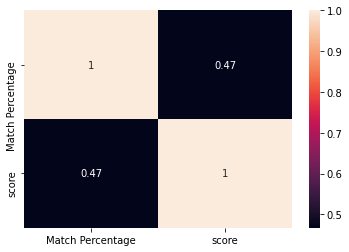

In [109]:
sns.heatmap(train1.corr(),annot=True) 

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>same for test</h1>

In [21]:
test1["score"]=0
for i in range(60):
    s=0
    for k in keywords:
        if k in test1["CV"][i]:
            s+=1

    test1["score"][i]=s

test1.head()

,CandidateID,CV,score
0,candidate_004,oliviasantosconsultantanalystexecutivesummaryd...,10
1,candidate_005,arminfitzgeralddatamanagerprofessionalprofilee...,14
2,candidate_014,gracebailrymachinelearningdevelopmentanddeploy...,15
3,candidate_016,ameliamartindatasciencemajorworkexperiencenaac...,16
4,candidate_017,jonathanhilljuniormachinelearningengineerskill...,25


<h1 style='color: rgb(77, 229, 240); text-align: center; font-family: cursive;font-size: 20px;'>Training Phase</h1>

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>Preparaion for training and testing phase</h1>

In [76]:
xtrain = np.array(train1["score"])
ytrain =  np.array(train1["Match Percentage"])
xtest =  np.array(test1["score"])

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>reshape numpy array</h1>

In [77]:
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytrain = ytrain.reshape(-1,1)

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>1) Linear Regression = 60.15</h1>

In [78]:
lr = LinearRegression().fit(xtrain,ytrain)
preL = lr.predict(xtest)
#to create list
pre=[]
for i in range(60):
    pre.append(preL[i][0])
#create dictionary   
res={
    "CandidateID":list(test1.CandidateID),
    "Match Percentage":pre
}
#create dataframe
res=pd.DataFrame(res)
#upload to csv file time for res
res.to_csv("res.csv",index=False)

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>2) Decision Tree = 68.07</h1>

In [91]:
dt=DecisionTreeRegressor()
dt=dt.fit(xtrain,ytrain)
preT=dt.predict(xtest)

res={
    "CandidateID":list(test1.CandidateID),
    "Match Percentage":preT
}

res=pd.DataFrame(res)

res.to_csv("res.csv",index=False)

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>3) Random Forest = 71.66</h1>

In [99]:
rf =RandomForestRegressor(n_estimators=1000)
rf.fit(xtrain,ytrain)
preR=rf.predict(xtest)

res={
    "CandidateID":list(test1.CandidateID),
    "Match Percentage":preR
}

res=pd.DataFrame(res)

res.to_csv("res.csv",index=False)

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>4) Support vector = 46.88</h1>

In [93]:
sv = SVR()
sv.fit(xtrain,ytrain)
svP=sv.predict(xtest)

res={
    "CandidateID":list(test1.CandidateID),
    "Match Percentage":svP
}

res=pd.DataFrame(res)

res.to_csv("res.csv",index=False)

<h1 style='color: rgb(77, 229, 240); text-align: left; font-family: cursive;font-size: 20px;'>5) Boosting = 68.29</h1>

In [103]:
reg= GradientBoostingRegressor(random_state=0)
reg.fit(xtrain,ytrain)
regP=reg.predict(xtest)

res={
    "CandidateID":list(test1.CandidateID),
    "Match Percentage":regP
}

res=pd.DataFrame(res)

res.to_csv("res.csv",index=False)